# **Machine Learning Regression Project**

**Link for dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data**

In [1]:
# importing necessary dependencies

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20, 10)


In [2]:
# Loading the dataset

df1 = pd.read_csv('BHP.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape # Viewing the shape

(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count') 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# **Data Cleaning:Handling null values**

In [ ]:
# Drop these features as they don't really contribute in the house prediction
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

In [6]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()
# The proportion of null vals relative to the size of the dataset is negligible they will be simply
# dropped

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**Dropping null values**

In [8]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# **Feature Engineering**

**Extracting number of rooms using .split() method**

In [10]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\avkha\AppData\Local\Temp\ipykernel_22340\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


**Viewing total_sqft feature**

In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
# Here we check if all the records in total-sqft are actually floats
# We observe that some of records are in form of a range here
# and also some of them are mentioned in different units
df3[~df3['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [ ]:
df3[df3['total_sqft'].apply(is_float)] # Applying conversion to float to the vals which can be converted
# to float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. 
There are other cases such as 34.46Sq. Meter or 30 acres which can be dealt with unit conversion but I will drop them in this project since they don't form a very minute portion of the dataset**

In [ ]:
# Function to handle range vals
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

Testing code on some trivial inputs

In [18]:
convert_sqft_to_num('1020')

1020.0

In [19]:
convert_sqft_to_num('105-115')

110.0

In [20]:
convert_sqft_to_num('115sqm') # Return None

In [ ]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()] # Drop the ones where we got null i.e. 30 acres and other cases
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


**For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850**

In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
df5 = df4.copy()

**Adding a new feature:Price_per_sqft**

As this holds relevance in price prediction in Real-Estate domain

In [ ]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [26]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

# **Dimensionality Reduction**

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [27]:
len(df5.location.unique())

1298

In [28]:
df5.location = df5.location.apply(lambda x:x.strip()) # Removing extra space

In [29]:
location_stats = df5['location'].value_counts()
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [30]:
len(location_stats)

1287

In [31]:
len(location_stats[location_stats<10])

1033

**Any location less than 10 will be categorised as 'other' enabling dimensional reduction this way the number of features reduce thus allowing us to**
**work with fewer dummy columns during One Hot Encoding**

In [32]:
location_stats_less_than_10 =  location_stats[location_stats<=10]

In [33]:
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [34]:
df5['location'] = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

# **Removing outliers**

**Using domain knowledge of the dataset the records with sq.ft area per room val less than 300 is unlikely hence an outlier**

In [35]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<=300)]
df6.shape

(12274, 7)

In [36]:
df6['price_per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

**Removing outliers using one standard deviation**

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # key is the group and subdf is dataframe corresponding to it
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [38]:
df7 = remove_pps_outliers(df6)
df7.shape

(10018, 7)

**Below is the visualisation of the prices and total_sqft area of 2 and 3bhk according to the location**

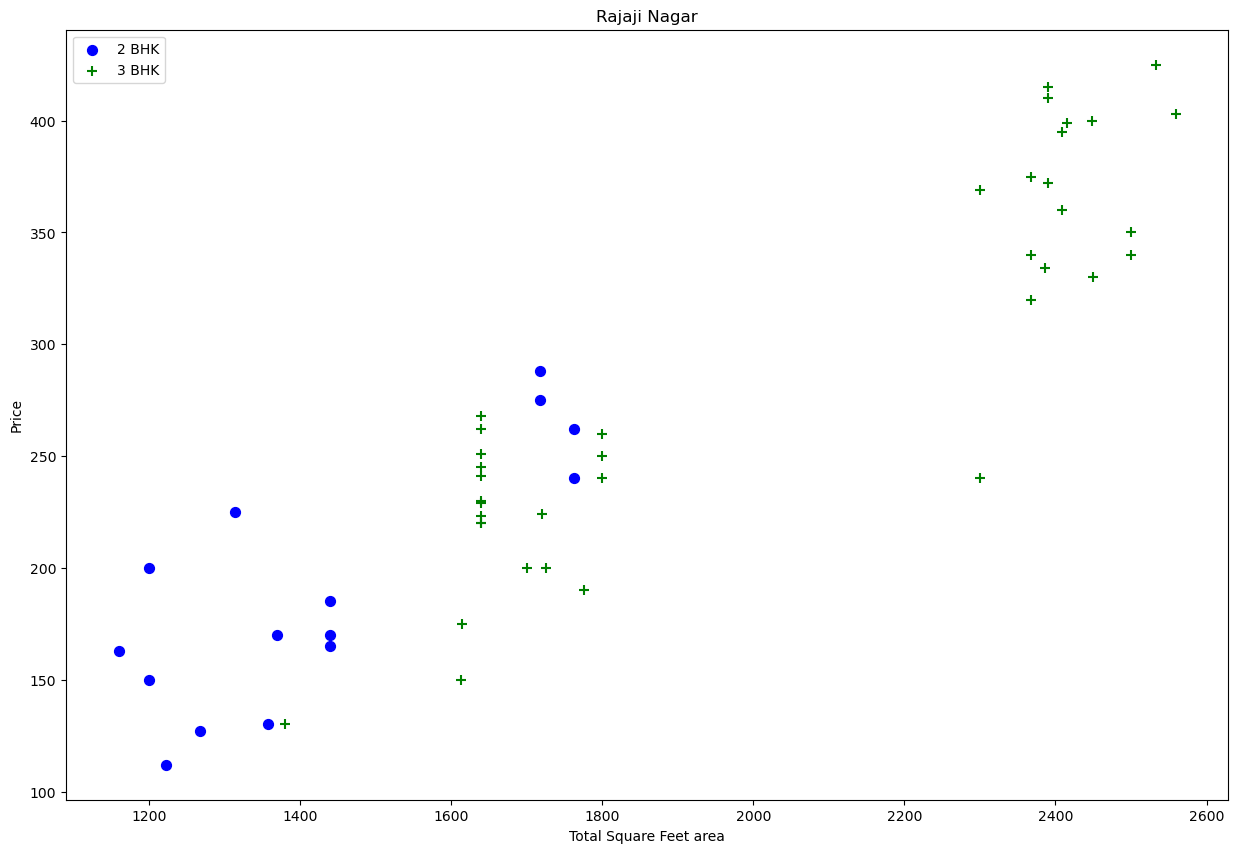

In [39]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

In [40]:
# Here above we see that there are cases of 3BHK whose price is less than the average of 2BHK for the
# same Total sq ft area likely meaning that this is an outlier case

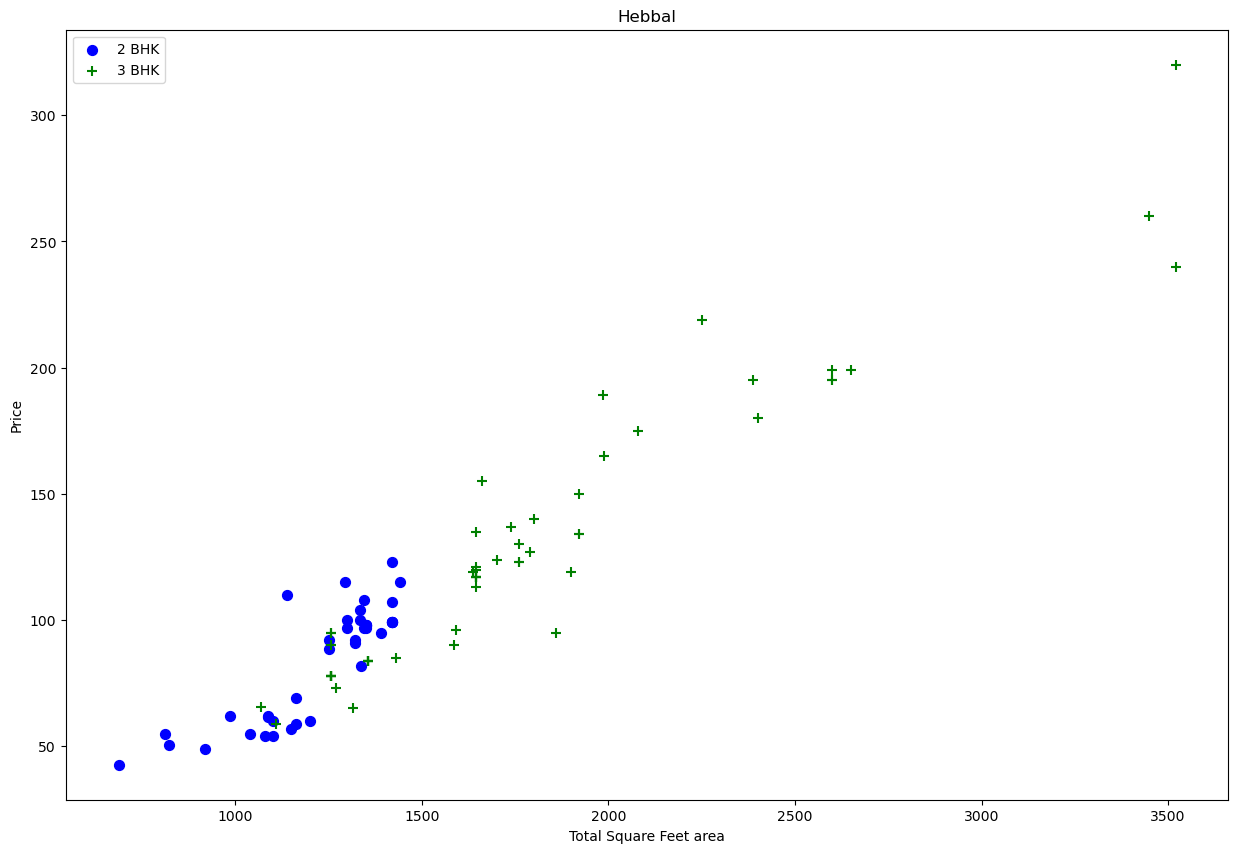

In [41]:
plot_scatter_chart(df7, "Hebbal")

**Hence we should remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). So what we will do is that for a given location, we will build a dictionary of stats per bhk, i.e.**

**{**
    **'1' : {**
        **'mean': 4000,**
        **'std: 2000,**
      **'count': 34**
     **},**
    **'2' : {**
        **'mean': 4300,**
        **'std: 2300,**
        **'count': 22**
  **},**
**}**

**Now we can remove those nBHK apartments whose price_per_sqft is less than mean price_per_sqft of (n-1) BHK apartment generally speaking**


In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape



(7150, 7)

In [43]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7150, 7)

**Can clearly note the difference now**

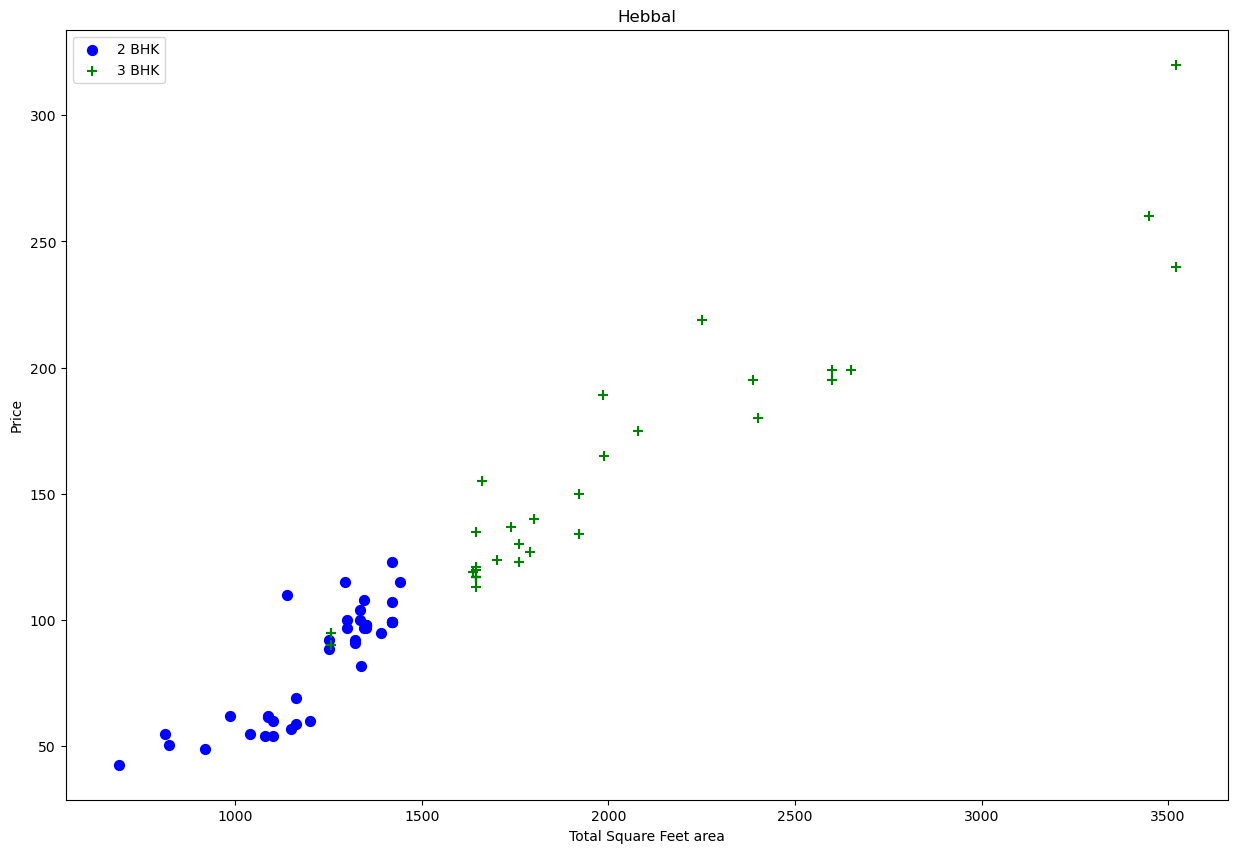

In [44]:
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

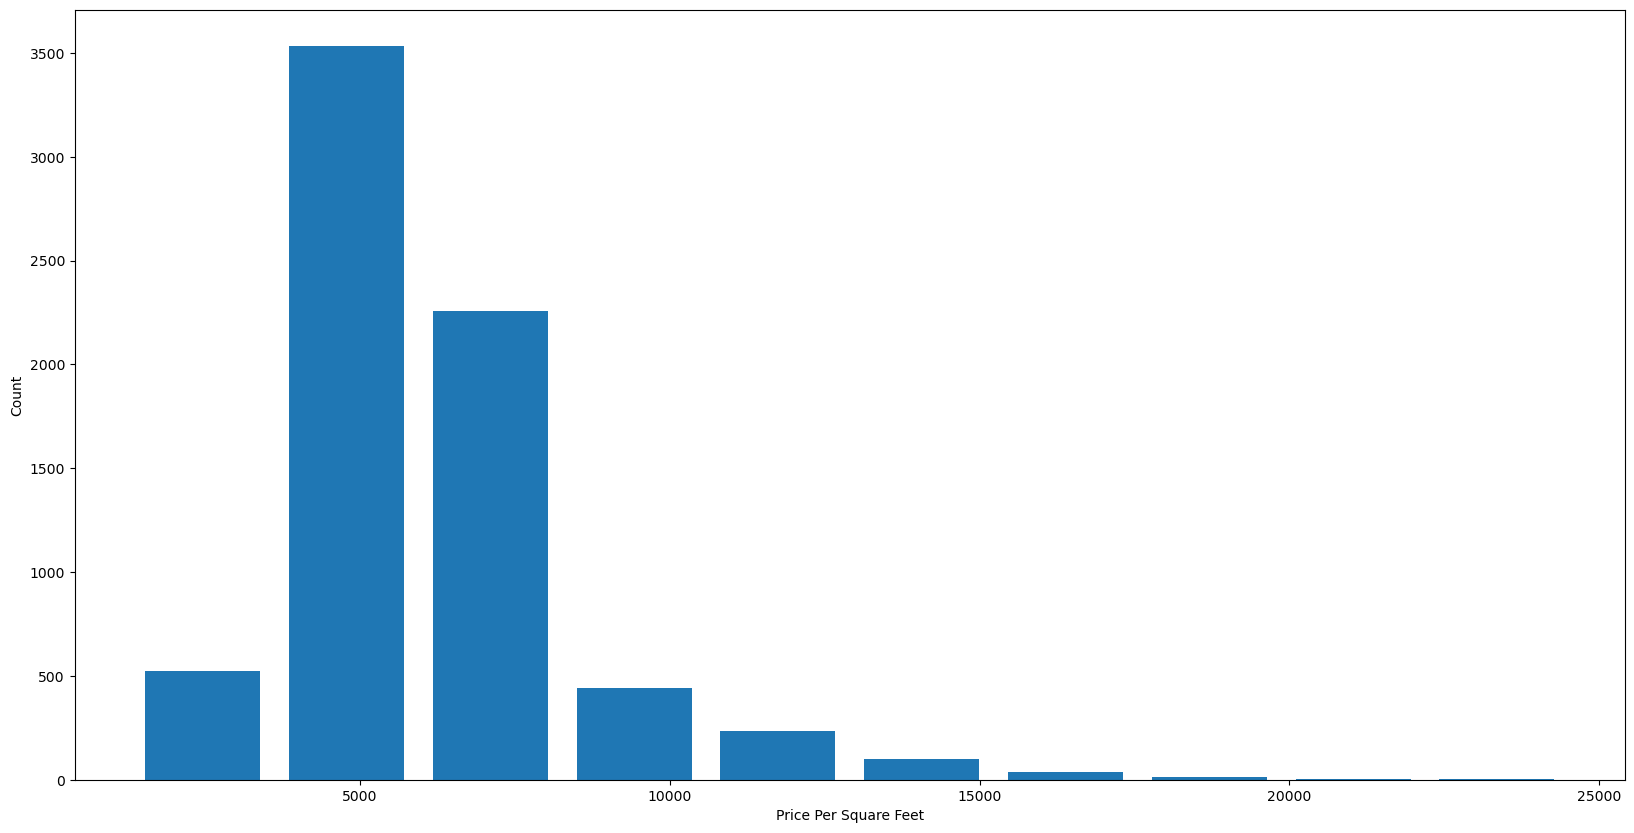

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# **Outlier removal using bath feature**

In [46]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

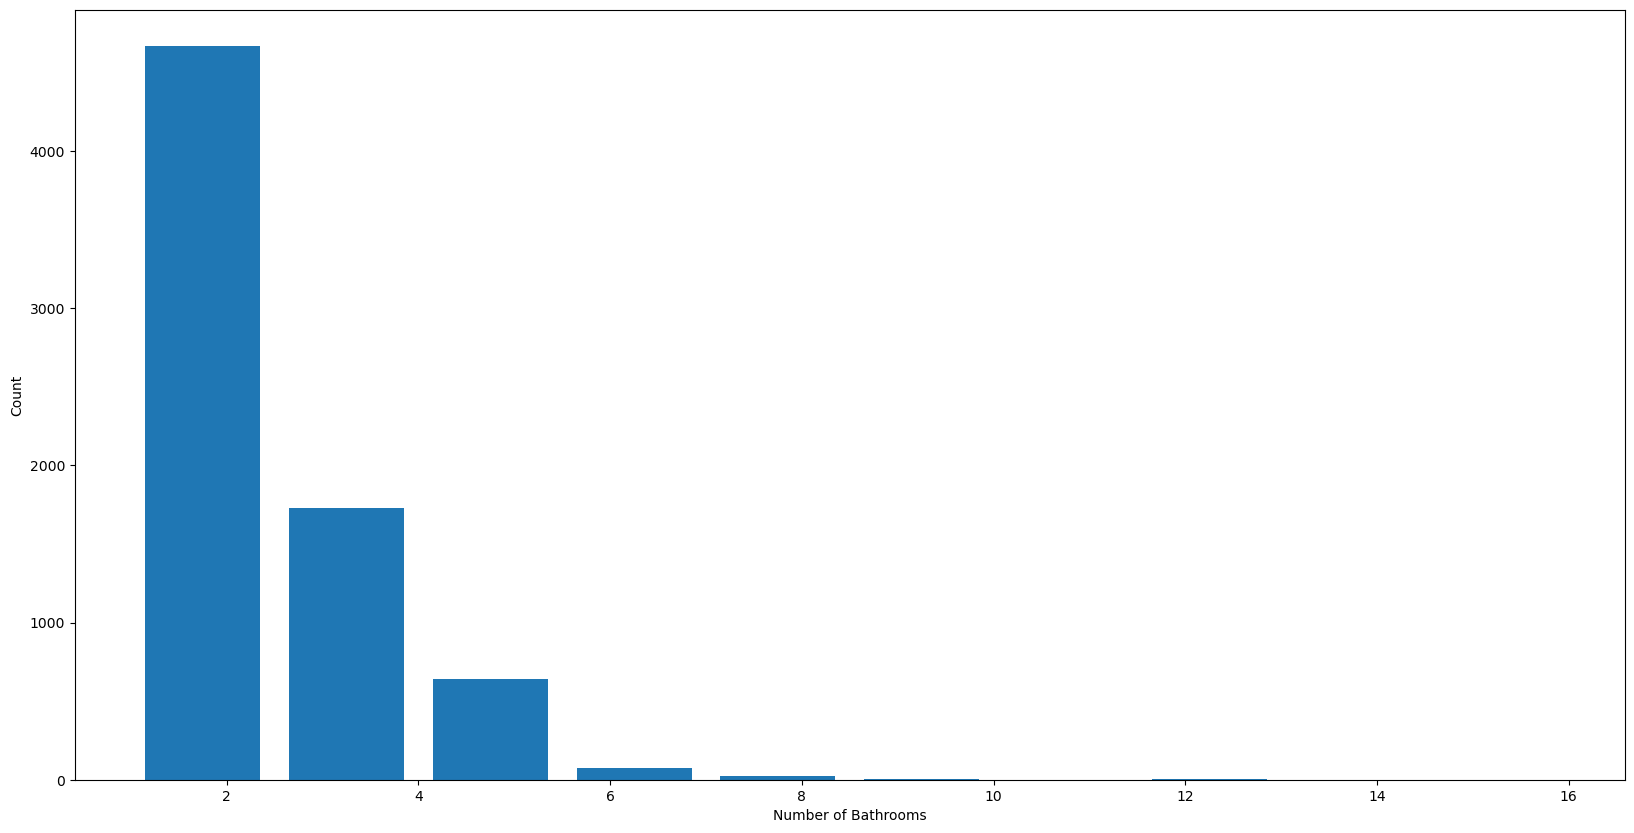

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

**Again using domain knowledge we can say that bathroom being being 2 or more greater than bedroom is unlikely indicating it to be a posssible outlier**

In [48]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1565,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8229,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7074, 7)

In [50]:
# Dropping the unnecessarily columns to train the model now
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# **Use One Hot Encoding on Location**

In [51]:
dummies = pd.get_dummies(df10.location)

In [52]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns') # Getting rid of Dummy variable trap
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12 = df11.drop('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Build a Model now....**

In [54]:
df12.shape

(7074, 244)

In [55]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
X.shape

(7074, 243)

In [57]:
y=df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [58]:
len(y)

7074

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7955563724740065

# **Use K-Fold cross validation to measure accuracy of Linear Regression Model**

In [61]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

np.mean(cross_val_score(LinearRegression(), X, y, cv=cv))

0.8383786528860913

Linear Regression model explains 81% of the variance in the data across the 5 random splits.

# **Using GridSearchCV for hyperparameter tuning**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 


In [63]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=scores[0].keys())

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.838379,{}
1,lasso,0.695631,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.720268,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Based on the results above Linear Regression looks best to use hence it will be used as our model**

# **Testing model on a few properties**

In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] # Finding in the index of the location

    x = np.zeros(len(X.columns)) # Setting up an input matrix
    # Setting the values of first 3 feautures
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    # If found mark that index with 1
    if loc_index >= 0:
        x[loc_index] = 1
    # If not means it is others so setting all as 0

    return lr_clf.predict([x])[0]

Making some custom predictions

In [65]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.57363354492247

In [66]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.9335238641489

In [67]:
predict_price('Indira Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.6581995980406

In [68]:
predict_price('Indira Nagar', 1000, 3, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


182.495034582626

# **Export the tested model to a pickle file**

In [69]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

# **Exporting Column information to a json file**

In [ ]:
# Export location and column information to a file that will be useful later on in our prediction application

import json
columns = {
    # Converting all cols to lower case
    # Here in the json file data columns will be the key and lower-cased columns will be the values
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))